<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/s24LinearModelNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

In [1]:
### Includes
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
####%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import math

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Range2 = lambda x, p: (round(x-(10**-p)/2,p+1), round(x,p+1), round(x+(10**-p)/2,p+1))
RoundIt = lambda x, e: (round(x-e/2,3), round(x,3), round(x+e/2,3))

[-14.25, 1.51, 5.32, 7.99, 11.56]


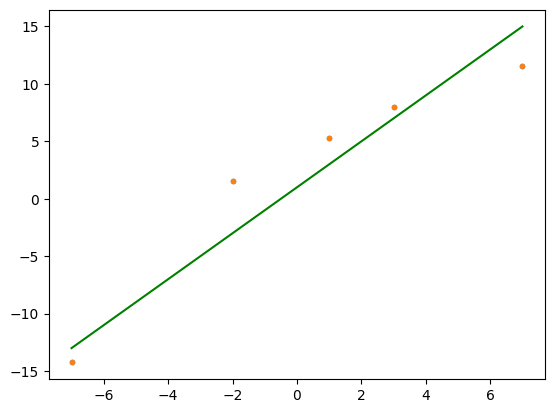

In [3]:
eps = 10.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


F = lambda w, x: w[0] + w[1]*x
X = [-7, -2, 1, 3, 7]
Y = [round(F(coef, x) + Noise(eps),2) for x in X]
print (Y)

plt.plot(X,Y,'.')
Hxs = [F(coef, x) for x in X]

plt.plot(X, Y, '.')
plt.plot(X, Hxs, '-', color="green")
plt.show()

In [ ]:
# Print Examples:
X = [-7, -2, 1, 3, 7]
Y = [-14.25, 1.51, 5.32, 7.99, 11.56]
Examples = list(zip(X,Y))

for p in Examples:
  print (p)

(-7, -14.25)
(-2, 1.51)
(1, 5.32)
(3, 7.99)
(7, 11.56)


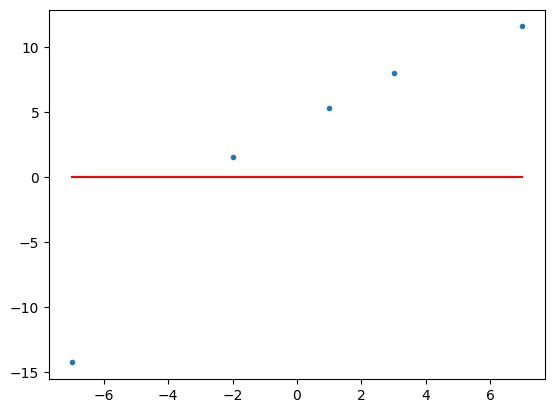

In [ ]:
# Plot Model
def PlotModel(X, Y, model):
  Hxs = [F(model, x) for x in X]

  plt.plot(X, Y, '.')
  plt.plot(X, Hxs, '-', color="red")
  plt.show()

PlotModel( X, Y , (0,0))

In [2]:
SquaredError = lambda X, Y, w : sum([(y-F(w, x))**2 for x,y in zip(X,Y)])
SquaredErrorLogistic = lambda X, Y, w : sum([(y-G(F(w, x)))**2 for x,y in zip(X,Y)])


In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-F(w, x)) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [-14.25, 1.51, 5.32, 7.99, 11.56]
Predicts =  [0, 0, 0, 0, 0]
Errors= [99.75, -3.02, 5.32, 23.97, 80.92] 206.94 41.388


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (f"{model=}, {SquaredError(X, Y, model)=}")

model=(0, 0), SquaredError(X, Y, model)=431.1187
model=(0, 1), SquaredError(X, Y, model)=129.2387
model=(1, 0), SquaredError(X, Y, model)=411.8587
model=(1, 1), SquaredError(X, Y, model)=113.97870000000002
model=(1, 2), SquaredError(X, Y, model)=40.098699999999994


In [ ]:
## Average Gradients
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-14.25  99.75]
 [  1.51  -3.02]
 [  5.32   5.32]
 [  7.99  23.97]
 [ 11.56  80.92]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
for g in GradientBatch:
  print (f"{g=}")

[ 2.426 41.388]
g=2.426
g=41.388


In [ ]:
## Try Different Learning Rates
print (f"{w=}, {SquaredError(X, Y, w)=}")
for learningRate, model in [(learningRate, np.add(w, GradientBatch*learningRate)) for learningRate in (0.01, 0.1, 1.0)]:
  print (f"{model=}, {learningRate=}, {SquaredError(X, Y, model)=}")

w=[0, 0], SquaredError(X, Y, w)=431.1187
model=array([0.02426, 0.41388]), learningRate=0.01, SquaredError(X, Y, model)=278.461828946
model=array([0.2426, 4.1388]), learningRate=0.1, SquaredError(X, Y, model)=635.0997745999998
model=array([ 2.426, 41.388]), learningRate=1.0, SquaredError(X, Y, model)=175525.90795999998


In [ ]:
print (SquaredError(X, Y, (0.018, 0.452)))
print (SquaredError(X, Y, (0.18, 4.52)))


266.524472
847.6354999999999


In [ ]:
# Algorithm Test
learningRate = 0.01
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Iterations = 0
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")

Iterations=0, w=[0, 0]  SquaredError(X, Y, w)=431.1187


In [ ]:
Iterations = Iterations + 1
GradientBatch = np.array([0.0, 0.0])
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
w = np.add(w, GradientBatch*learningRate)
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")
#print ( {SquaredError(X, Y, w)=})

[ 2.426 41.388]
Iterations=1, w=array([0.02426, 0.41388])  SquaredError(X, Y, w)=278.461828946


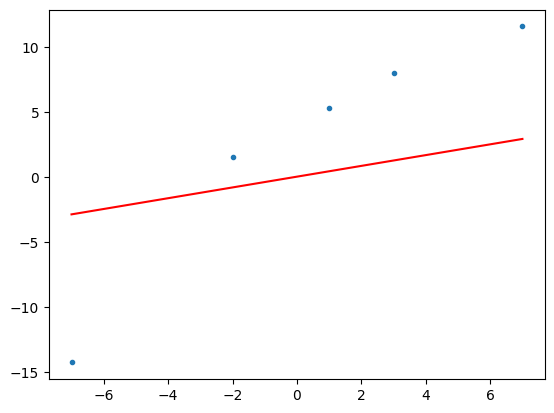

In [ ]:
PlotModel(X, Y, w)

model=(1.7, 1.82)


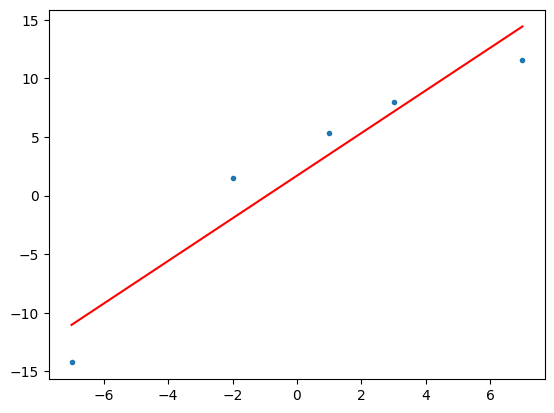

[-7, -2, 1, 3, 7] [-14.25, 1.51, 5.32, 7.99, 11.56]


In [ ]:
cv = np.cov(X, Y, bias=True, rowvar=False)
w1 = round(cv[1][0]/cv[0][0], 2)
w0 = round(np.mean(Y) - w1*np.mean(X), 2)
model = (w0, w1)
print (f"{model=}")
PlotModel(X, Y, model)
print (X, Y)

In [ ]:
learningRate = 0.01
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
totalIterations = 5000
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")
for i in range(totalIterations):
  GradientBatch = np.array([0.0, 0.0])
  Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
  for g in Gradients:
    GradientBatch += g
  GradientBatch = GradientBatch/len(Gradients)
  w = np.add(w, GradientBatch*learningRate)
print (f"{totalIterations=}, {w=}  {SquaredError(X, Y, w)=}")

Iterations=1, w=[0, 0]  SquaredError(X, Y, w)=431.1187
totalIterations=5000, w=array([1.69906475, 1.81733813])  SquaredError(X, Y, w)=34.42909208633094


# Logistic Regression

In [ ]:
G = lambda xIn: 1/(1+np.e**(-xIn))

In [ ]:
Predict = lambda x: 1.0 if x > 0.5 else 0.0
w = (0,0)
Y = [Predict(G(F(coef, x))) for x in X]
for x, y in zip(X, Y):
  print (x, y)

-7 0.0
-2 0.0
1 1.0
3 1.0
7 1.0


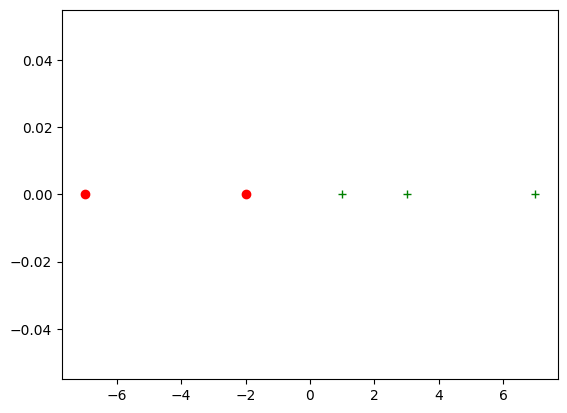

In [ ]:
def PlotLogisticData(X, Y, model):
  posX = []
  posY = []
  negX = []
  negY = []
  for x, y in zip(X,Y):
    if y:
      posX += [x]
      posY += [Predict(G(F(model,x)))]
    else:
      negX += [x]
      negY += [Predict(G(F(model,x)))]
  plt.plot(posX, posY, '+', color='green')
  plt.plot(negX, negY, 'o', color='red')
  plt.show()
PlotLogisticData(X, Y, w)

In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-G(F(w, x))) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [0.0, 0.0, 1.0, 1.0, 1.0]
Predicts =  [0, 0, 0, 0, 0]
Errors= [3.5, 1.0, 0.5, 1.5, 3.5] 10.0 2.0


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (model, SquaredErrorLogistic(X, Y, model), RoundIt(SquaredErrorLogistic(X, Y, model),0.1) )

(0, 0) 1.25 (1.2, 1.25, 1.3)
(0, 1) 0.0887896982223366 (0.039, 0.089, 0.139)
(1, 0) 1.2858817551625858 (1.236, 1.286, 1.336)
(1, 1) 0.0868685548209095 (0.037, 0.087, 0.137)
(1, 2) 0.004499256912790766 (-0.046, 0.004, 0.054)


In [ ]:
## Average Gradients
w = ws[0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-G(F(w,x[1])))*x[0], (y-G(F(w,x[1])))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-0.5  3.5]
 [-0.5  1. ]
 [ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  3.5]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
print (X, Y)

[0.1 2. ]
[-7, -2, 1, 3, 7] [0.0, 0.0, 1.0, 1.0, 1.0]


In [ ]:
wNew = np.add(w, GradientBatch*learningRate)
print (wNew)
print (w)
print (SquaredErrorLogistic(X, Y, (0,0)))
print (w, SquaredErrorLogistic(X, Y, w))
for model in [np.add(w, GradientBatch*learningRate) for learningRate in (1, 1)]:
  print (model, SquaredErrorLogistic(X, Y, model))
  print (model, RoundIt(model[0],0.1), RoundIt(model[1],1.0))

[0.001 0.02 ]
(0, 0)
1.25
(0, 0) 1.25
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.1, 0.15) (1.5, 2.0, 2.5)
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.1, 0.15) (1.5, 2.0, 2.5)


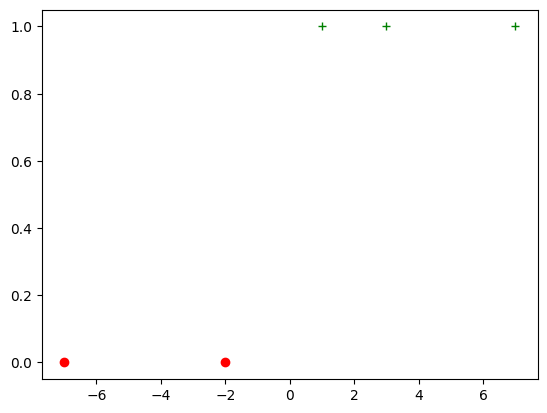

0.3010299956639812


In [ ]:
PlotLogisticData(X, Y, (0.1, 2))
print (np.log10(2))

In [ ]:
print (G(14.1))

0.9999992476022669


# More Logistic Regression


[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]


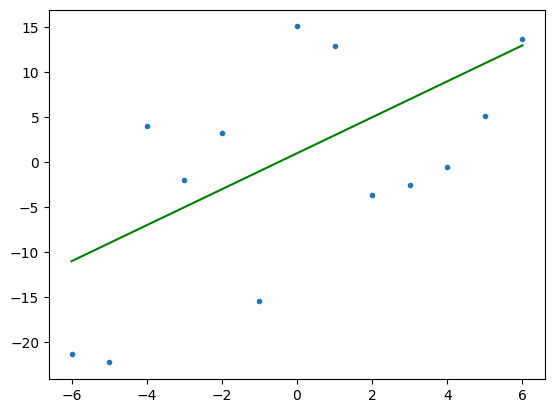

In [ ]:
F2 = lambda w, x: x[1] - w[0] - w[1]*x[0]
eps = 30.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


X1 = range(-6, 7, 1)
X2 = [round(F(coef, x) + Noise(eps),2) for x in X1]
Y = [1 if F2(coef,x) > 0 else 0 for x in zip(X1, X2)]
print (Y)

plt.plot(X1, X2,'.')
Hxs = [F(coef, x) for x in X1]

plt.plot(X1, Hxs, '-', color="green")
plt.show()

In [ ]:
def Separate(Data):
  pos = []
  neg = []
  for i in range(len(Data)):
    if Data[i][1]==0:
      neg.append(Data[i])
    else:
      pos.append(Data[i])
  return neg, pos

In [ ]:
X = list(zip(X1, X2))
Data = list(zip(X, Y))
neg, pos = Separate(Data)
print (f"{neg=} {pos=}")

neg=[((-6, -21.32), 0), ((-5, -22.26), 0), ((-1, -15.38), 0), ((2, -3.63), 0), ((3, -2.55), 0), ((4, -0.5), 0), ((5, 5.13), 0)] pos=[((-4, 3.99), 1), ((-3, -1.97), 1), ((-2, 3.24), 1), ((0, 15.1), 1), ((1, 12.97), 1), ((6, 13.74), 1)]


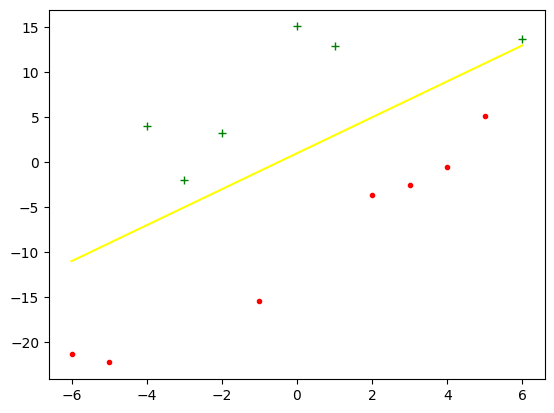

In [ ]:
negatives, positives = Separate(Data)
dataX1pos = [x[0] for x,y in positives]
dataX2pos = [x[1] for x,y in positives]
dataX1neg = [x[0] for x,y in negatives]
dataX2neg = [x[1] for x,y in negatives]

iteration = 0
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "r.")

Hxs = [F(coef, x) for x in X1]
plt.plot(X1, Hxs, '-', color="yellow")
plt.show()

# Example


In [ ]:
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
Fx2 = lambda W, X: (W[0]*X[0]+W[1]*X[1])/(-1*W[2])
data = [((1,2,3),0), ((1,3,4),0), ((1,4,5),0), ((1,5,6),1), ((1,6,7),1), ((1,8,9),1) ]
data = [((1, -7, 10), 0), ((1, -3, 4), 0), ((1, 8, 7), 1), ((1, 1, 16), 0), ((1, 8, -4), 1), ((1, 9, 5), 1), ((1, -4, 14), 0), ((1, -1, -8), 1), ((1, -8, 0), 0), ((1, 8, 3), 1)] ## data2## data2

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

In [ ]:
data = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0),
         ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0),
         ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0),
         ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0),
         ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0),
         ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0),
         ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0),
         ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1),
         ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1),
         ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1),
         ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1),
         ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1),
         ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1),
         ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1),
         ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2),
         ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2),
         ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2),
         ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2),
         ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2),
         ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2),
         ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2),
         ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

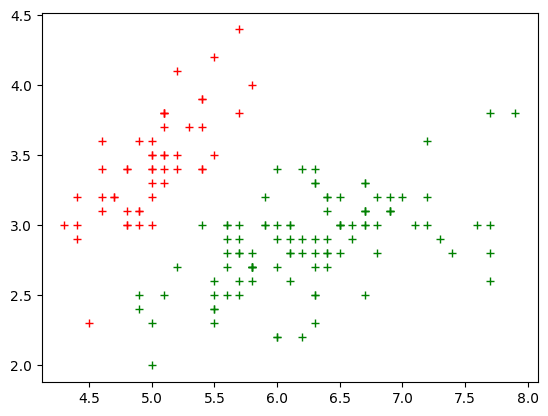

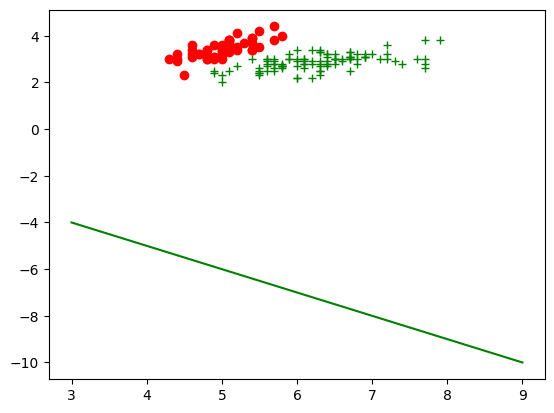

0 (0.001, 0.001, 0.001)


In [ ]:
np.random.seed(22)
rangeValue = (3,10)
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
#model = [random.random(),random.random(),random.random()]
model=(0.001,0.001,0.001)
alpha = 0.1
alpha1 = 0.1 ## data 2 alpha
alpha2 = 0.1

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

dataX1 = [x[1] for x,y in data]
dataX2 = [x[2] for x,y in data]

negatives, positives = Separate(data)
dataX1pos = [x[1] for x,y in positives]
dataX2pos = [x[2] for x,y in positives]
dataX1neg = [x[1] for x,y in negatives]
dataX2neg = [x[2] for x,y in negatives]

iteration = 0
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "r+")
plt.show()
YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "ro")
plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
plt.show()
print(iteration, model)


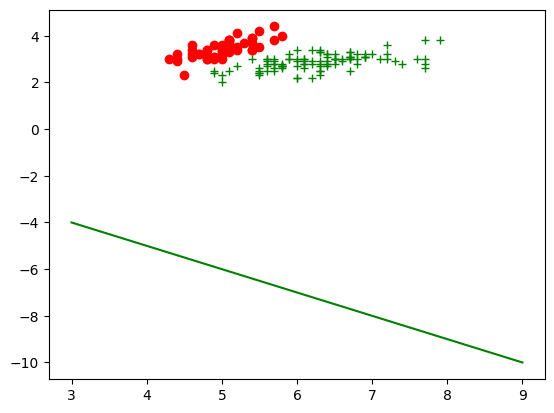

0 (0.001, 0.001, 0.001)


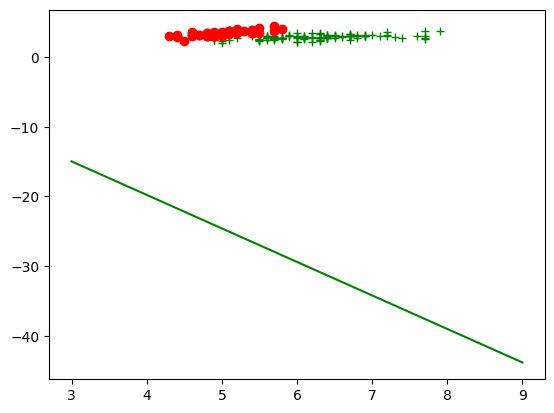

10 [0.03719158389993168, 0.33858927562721547, 0.07036368358678491]


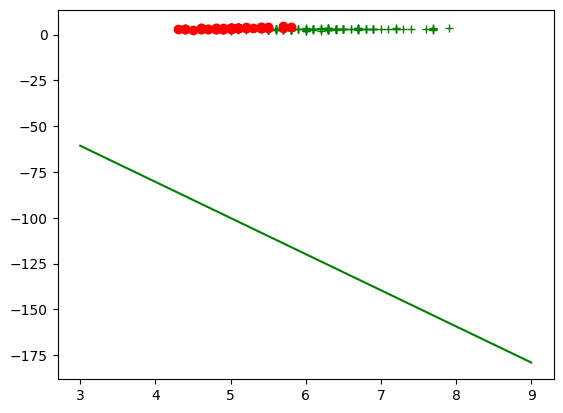

20 [0.029914403688717985, 0.3793162229334939, 0.019248111736648265]


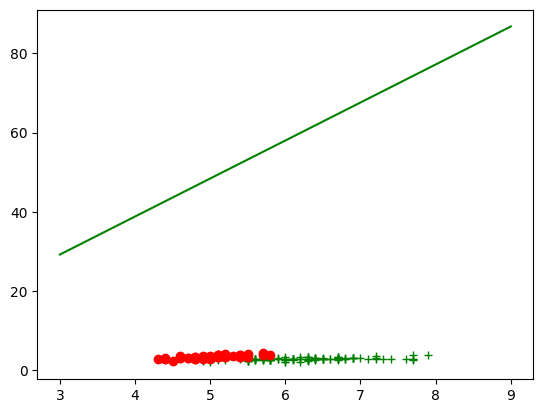

30 [0.019524011778922813, 0.40239201707780475, -0.04195409941470878]


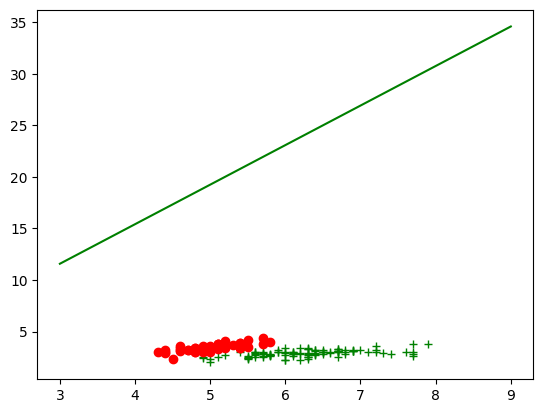

40 [0.007641963959389207, 0.42250003806934117, -0.11012778372286583]


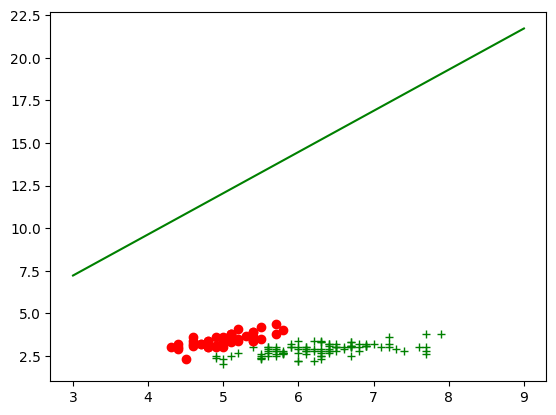

50 [-0.005139394433525741, 0.44463107808987656, -0.18402587497150932]


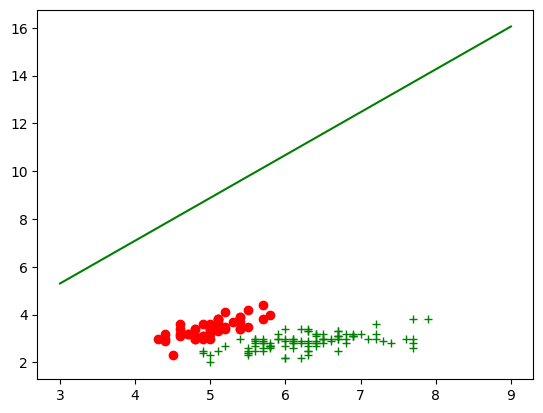

60 [-0.01850877771952353, 0.4705611398308249, -0.26267678119785925]


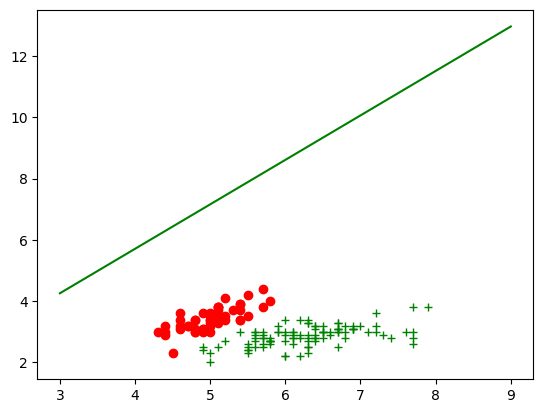

70 [-0.03227362801826262, 0.5005732166937356, -0.3451479596756229]


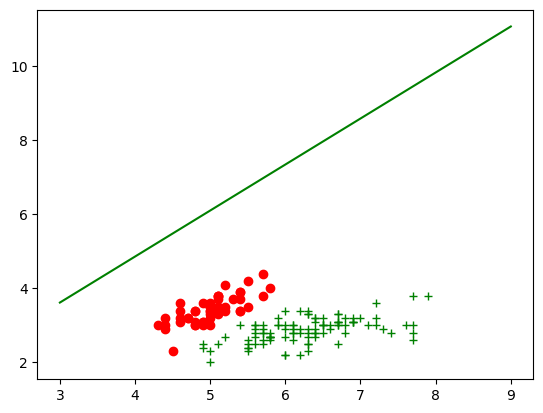

80 [-0.04628459841835359, 0.5343180400957924, -0.43046321523168807]


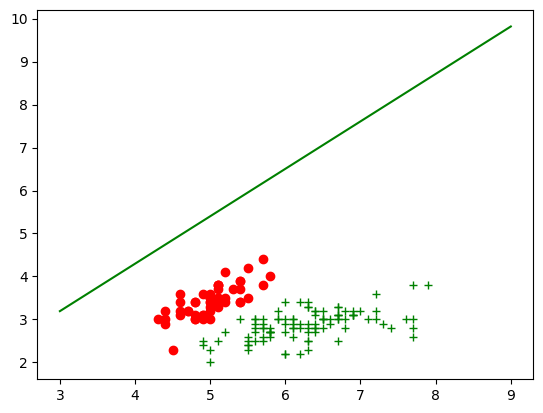

90 [-0.0604088462387872, 0.5712029325870476, -0.517612531583876]


In [ ]:
iteration = 0
totalIterations = 100
printIterations = 10
for _ in range(totalIterations):
  yPredicted = [sigmoid(F(model, x)) for x in X]
  if iteration % printIterations  == 0:
    YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
    plt.plot(dataX1pos, dataX2pos, "g+")
    plt.plot(dataX1neg, dataX2neg, "ro")
    plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
    plt.show()
    print(iteration, model)
  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  if (iteration+1)%1000==0:
    print("Iteration: ", iteration, "Error=", Error, model)
    #plt.plot(dataX1, yPredicted, "r+")
    #plt.plot(dataX1, Y, "g+")
    #plt.show()
  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX2 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[2]) for r,y,x in zip(Y, yPredicted, X)] )

  model = [model[0]-alpha1*deltaX0, model[1]-alpha1*deltaX1, model[2]-alpha1*deltaX2]
  iteration += 1

In [ ]:
iteration = 0
totalIterations = 20000
printIterations = 1000
for _ in range(totalIterations):
  yPredicted = [sigmoid(F(model, x)) for x in X]
  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  if iteration%printIterations==0:
    print("Iteration: ", iteration, "Error=", Error, model)
    #plt.plot(dataX1, yPredicted, "r+")
    #plt.plot(dataX1, Y, "g+")
    #plt.show()
  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX2 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[2]) for r,y,x in zip(Y, yPredicted, X)] )

  model = [model[0]-alpha1*deltaX0, model[1]-alpha1*deltaX1, model[2]-alpha1*deltaX2]
  iteration += 1

Iteration:  0 Error= 87.82913950000415 [-0.07452880484648727, 0.6105479898490707, -0.6056162234294623]
Iteration:  1000 Error= 56.91390454757567 [-0.7127834309883042, 2.5436355075081667, -3.9517633713830533]
Iteration:  2000 Error= 54.58094621640255 [-0.9824495975364035, 3.176529756801453, -4.97016700892917]
Iteration:  3000 Error= 53.669568512396914 [-1.1743558301591552, 3.577039472485061, -5.606000330876993]
Iteration:  4000 Error= 53.16691204711841 [-1.3290638665964698, 3.87554150446739, -6.075463112286811]
Iteration:  5000 Error= 52.842529142486825 [-1.4611929763155678, 4.115666123072972, -6.4502890994940705]
Iteration:  6000 Error= 52.61328822820388 [-1.5778649239225424, 4.317625115927819, -6.763541242992173]
Iteration:  7000 Error= 52.441369683073916 [-1.6831493087389082, 4.492523865319226, -7.03331555552532]
Iteration:  8000 Error= 52.306918112719195 [-1.779617829215342, 4.647154547065553, -7.270643417533447]
Iteration:  9000 Error= 52.19843461477117 [-1.8690129151037262, 4.7859

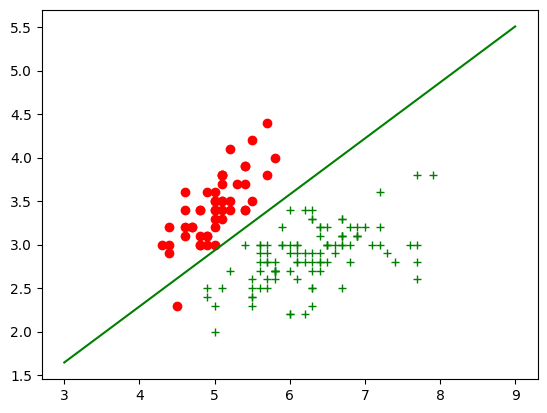

In [ ]:
model = [-2.539199432207093, 5.714317984749782, -8.876870949270439]
YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "ro")
plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
plt.show()


# Multi Dimensional Linear Case

[-22.0, 6.0, 27.0, 13.0, 0.0]


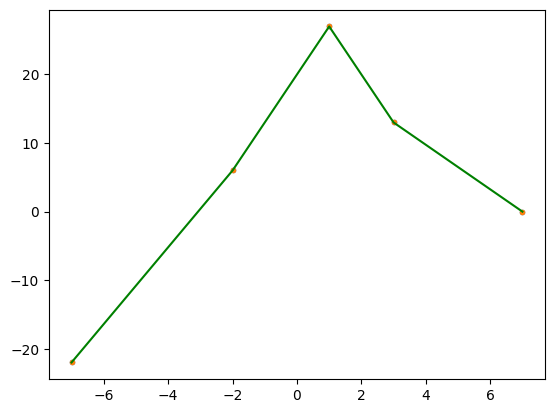

In [ ]:
eps = 0
coef = (1, 2, 3)
w = (0, 0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


Fa = lambda w, x: w[0] + w[1]*x[0] + w[2]*x[1]
X = [(-7, -3), (-2, 3), (1, 8), (3, 2), (7, -5)]
Y = [round(Fa(coef, x) + Noise(eps),2) for x in X]
print (Y)

X1 = [x1 for (x1, x2) in X]
plt.plot(X1,Y,'.')
Hxs = [Fa(coef, x) for x in X]

plt.plot(X1, Y, '.')
plt.plot(X1, Hxs, '-', color="green")
plt.show()

In [ ]:
SquaredErrorA = lambda X, Y, w : sum([(y-Fa(w, x))**2 for x,y in zip(X,Y)])

In [ ]:
ws= [(0,0,0), (0,1,0), (1,0,1), (1,1,1), (1,2,3)]
for model in ws:
  print (model, SquaredErrorA(X, Y, model))

(0, 0, 0) 1418.0
(0, 1, 0) 1114.0
(1, 0, 1) 844.0
(1, 1, 1) 532.0
(1, 2, 3) 0.0


In [ ]:
## Average Gradients
w = [0,0,0]
data = [(x,y) for x, y in zip(X,Y)]
print(data)
Gradients = np.array([ ((y-Fa(w,x)), (y-Fa(w,x))*x[0], (y-Fa(w,x))*x[1]   ) for (x, y) in data ])
print(Gradients)

[((-7, -3), -22.0), ((-2, 3), 6.0), ((1, 8), 27.0), ((3, 2), 13.0), ((7, -5), 0.0)]
[[-22. 154.  66.]
 [  6. -12.  18.]
 [ 27.  27. 216.]
 [ 13.  39.  26.]
 [  0.   0.  -0.]]


In [ ]:
GradientBatch = np.array([0.0, 0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
for g in GradientBatch:
  print (f"{g=}")

[ 4.8 41.6 65.2]
g=4.8
g=41.6
g=65.2


In [ ]:
learningRate = 0.1
wNew = np.add(w, GradientBatch*learningRate)
print (wNew)
print (w)
print (SquaredErrorA(X, Y, (0,0,0)))
print (w, SquaredErrorA(X, Y, w))
for (l, model) in [(learningRate, np.add(w, GradientBatch*learningRate)) for learningRate in (0.01, 0.1, 1.0)]:
  print (l, model, SquaredErrorA(X, Y, model))

[0.48 4.16 6.52]
[0, 0, 0]
1418.0
[0, 0, 0] 1418.0
0.01 [0.048 0.416 0.652] 881.2543840000001
0.1 [0.48 4.16 6.52] 1785.1984000000007
1.0 [ 4.8 41.6 65.2] 578555.44


In [ ]:
# Algorithm Test
learningRate = 0.01
w = [0,0,0]
data = [(x,y) for x, y in zip(X, Y)]
Iterations = 0
print (f"{Iterations=}, {w=}  {SquaredErrorA(X, Y, w)=}")

Iterations=0, w=[0, 0, 0]  SquaredErrorA(X, Y, w)=1418.0


In [ ]:
Iterations = Iterations + 1
GradientBatch = np.array([0.0, 0.0, 0.0])
Gradients = np.array([ ((y-Fa(w,x)), (y-Fa(w,x))*x[0], (y-Fa(w,x))*x[1]   ) for (x, y) in data ])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
w = np.add(w, GradientBatch*learningRate)
print (f"{Iterations=}, {w=}  {SquaredErrorA(X, Y, w)=}")
#print ( {SquaredError(X, Y, w)=})

[ 4.8 41.6 65.2]
Iterations=1, w=array([0.048, 0.416, 0.652])  SquaredErrorA(X, Y, w)=881.2543840000001


# Quiz 1

In [ ]:
Y = [-13, -3, 3, 7, 15]
y2 = [y**2 for y in Y ]
y2Sum = sum(y2)
print (f"{y2=}, {y2Sum=}, {y2Sum/len(y2)=}")

y2=[169, 9, 9, 49, 225], y2Sum=461, y2Sum/len(y2)=92.2


In [ ]:
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
y2 = [(y-x[1])**2 for (x,y) in trainingData ]
y2Sum = sum(y2)
print (f"{y2=}, {y2Sum=}, {y2Sum/len(y2)=}")

y2=[36, 1, 4, 16, 64], y2Sum=121, y2Sum/len(y2)=24.2


In [ ]:
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
y2 = [(y-x[0])**2 for (x,y) in trainingData ]
y2Sum = sum(y2)
print (f"{y2=}, {y2Sum=}, {y2Sum/len(y2)=}")

y2=[196, 16, 4, 36, 196], y2Sum=448, y2Sum/len(y2)=89.6


In [ ]:
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
y2 = [(y-(x[0]+x[1]))**2 for (x,y) in trainingData ]
y2Sum = sum(y2)
print (f"{y2=}, {y2Sum=}, {y2Sum/len(y2)=}")

y2=[49, 4, 1, 9, 49], y2Sum=112, y2Sum/len(y2)=22.4


In [ ]:
learningRate = 0.01
w=(0,0)
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
gradW0 = [ (y-(w[0]*x[0]+w[1]*x[1])) for (x,y) in trainingData ]
gradW1 = [((y-(w[0]*x[0]+w[1]*x[1]))*x[1]) for (x,y) in trainingData ]
gradW0sum = sum(gradW0)
gradW1sum = sum(gradW1)
print (f"{gradW1=}")
print (f"{gradW0sum=}, {gradW0sum/len(trainingData)=}, {gradW0sum/len(trainingData)*learningRate=}")
print (f"{gradW1sum=}, {gradW1sum/len(trainingData)=}, {gradW1sum/len(trainingData)*learningRate=}")

gradW1=[91, 6, 3, 21, 105]
gradW0sum=9, gradW0sum/len(trainingData)=1.8, gradW0sum/len(trainingData)*learningRate=0.018000000000000002
gradW1sum=226, gradW1sum/len(trainingData)=45.2, gradW1sum/len(trainingData)*learningRate=0.452


In [ ]:
learningRate = 0.001
w=(0.0018,0.0452)
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
Errors = [ (y-(w[0]*x[0]+w[1]*x[1]))**2 for (x,y) in trainingData ]
print( F"{sum(Errors)=}, {Errors=}")


sum(Errors)=440.76636212, Errors=[160.91937316, 8.47624996, 8.720208999999999, 47.09527875999999, 215.55525124000002]


In [ ]:
learningRate = 0.01
w=(0.018,0.452)
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
Errors = [ (y-(w[0]*x[0]+w[1]*x[1]))**2 for (x,y) in trainingData ]
print( F"{sum(Errors)=}, {Errors=}")


sum(Errors)=279.28821199999993, Errors=[97.10131599999998, 4.468996, 6.400899999999999, 31.651875999999994, 139.665124]


In [ ]:
learningRate = 0.01
w=(0.18,4.52)
trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
Errors = [ (y-(w[0]*x[0]+w[1]*x[1]))**2 for (x,y) in trainingData ]
print( F"{sum(Errors)=}, {Errors=}")


sum(Errors)=706.3411999999998, Errors=[340.7715999999999, 34.33959999999999, 2.8899999999999975, 45.42759999999998, 282.9123999999999]


In [ ]:
learningRate = 0.01
Activation = lambda z: 1/(1+math.exp(-z))
w=(1,1)
print (Activation(0))
trainingData = [((1, -7), 0),  ((1, -2), 0), ((1, 1), 1),  ((1, 3), 1),  ((1, 7), 1)]
Errors = [ (y-Activation(w[0]*x[0]+w[1]*x[1]))**2 for (x,y) in trainingData ]
print( F"{sum(Errors)=}, {sum(Errors)/len(Errors)=}, {Errors=}, ")


0.5
sum(Errors)=0.0868685548209095, sum(Errors)/len(Errors)=0.017373710964181898, Errors=[6.1138652747265155e-06, 0.07232948812851325, 0.01420933661861107, 0.00032350374880044124, 1.124597100038127e-07], 


In [ ]:
w=(1,1)
x=(1,-7)
Activation(w[0]*x[0]+w[1]*x[1])

0.0024726231566347743

# Quiz 1

In [ ]:
Range = lambda x, p: (round(x-(10**-p)/2,p+1), round(x,p+1), round(x+(10**-p)/2,p+1))
Fq = lambda w, x: w[0]*x[0] + w[1]*x[1]
SEq = lambda X, Y, w : sum([(y-Fq(w, x))**2 for x,y in zip(X,Y)])
Agr = lambda X, Y, w : np.sum([ np.array([(y-Fq(w, x))*x[0], (y-Fq(w, x))*x[1] ])  for x,y in zip(X,Y)], axis=0) / len(Y)
Agr2 = lambda X, Y, w : np.sum([ np.array([2*(y-Fq(w, x))*x[0], 2*(y-Fq(w, x))*x[1] ])  for x,y in zip(X,Y)], axis=0) / len(Y)
#trainingData = [((1, -7), -13), ((1, -2), -3), ((1, 1), 3), ((1, 3), 7), ((1, 7), 15)]
trainingData = ((1, -10), -19), ((1, -3), -5), ((1, 0), 1), ((1, 3), 7), ((1, 10), 21)
X = [x for x,y in trainingData]
Y = [y for x,y in trainingData]

print (F"{SEq(X, Y, (1,2))=}")

w1=(0,0)
w2=(0,1)
w3=(1,0)
w4=(1,1)

SEq(X, Y, (1,2))=0


In [ ]:
p=1
Wseq = SEq(X, Y, w1)
print (f"{w1=}: {Wseq=} / {Range(Wseq, p)=}")

Wseq = SEq(X, Y, w2)
print (f"{w2=}: {Wseq=} / {Range(Wseq, p)=}")

Wseq = SEq(X, Y, w3)
print (f"{w3=}: {Wseq=} / {Range(Wseq, p)=}")

Wseq = SEq(X, Y, w4)
print (f"{w4=}: {Wseq=} / {Range(Wseq, p)=}")

w1=(0, 0): Wseq=877 / Range(Wseq, p)=(876.95, 877, 877.05)
w2=(0, 1): Wseq=223 / Range(Wseq, p)=(222.95, 223, 223.05)
w3=(1, 0): Wseq=872 / Range(Wseq, p)=(871.95, 872, 872.05)
w4=(1, 1): Wseq=218 / Range(Wseq, p)=(217.95, 218, 218.05)


In [ ]:

LR =0.01
g = Agr(X, Y, w1)
p=3
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")
print("W/ 2")
g = Agr2(X, Y, w1)
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")

round(g[0]*LR,3)=0.01 / Range(g[0]*LR,p)=(0.0095, 0.01, 0.0105)
round(g[1]*LR,3)=0.872 / Range(g[1]*LR,p)=(0.8715, 0.872, 0.8725)
W/ 2
round(g[0]*LR,3)=0.02 / Range(g[0]*LR,p)=(0.0195, 0.02, 0.0205)
round(g[1]*LR,3)=1.744 / Range(g[1]*LR,p)=(1.7435, 1.744, 1.7445)


In [ ]:
LR =0.1
g = Agr(X, Y, w1)
p=2
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")
print("W/ 2")
g = Agr2(X, Y, w1)
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")

round(g[0]*LR,3)=0.1 / Range(g[0]*LR,p)=(0.095, 0.1, 0.105)
round(g[1]*LR,3)=8.72 / Range(g[1]*LR,p)=(8.715, 8.72, 8.725)
W/ 2
round(g[0]*LR,3)=0.2 / Range(g[0]*LR,p)=(0.195, 0.2, 0.205)
round(g[1]*LR,3)=17.44 / Range(g[1]*LR,p)=(17.435, 17.44, 17.445)


In [ ]:
LR =0.001
g = Agr(X, Y, w1)
p=4
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")
print("W/ 2")
g = Agr2(X, Y, w1)
print(f"{round(g[0]*LR,3)=} / {Range(g[0]*LR,p)=}")
print(f"{round(g[1]*LR,3)=} / {Range(g[1]*LR,p)=}")

round(g[0]*LR,3)=0.001 / Range(g[0]*LR,p)=(0.00095, 0.001, 0.00105)
round(g[1]*LR,3)=0.087 / Range(g[1]*LR,p)=(0.08715, 0.0872, 0.08725)
W/ 2
round(g[0]*LR,3)=0.002 / Range(g[0]*LR,p)=(0.00195, 0.002, 0.00205)
round(g[1]*LR,3)=0.174 / Range(g[1]*LR,p)=(0.17435, 0.1744, 0.17445)


# Quiz 1b

In [ ]:
G = lambda xIn: 1/(1+np.e**(-xIn))
SEqg = lambda X, Y, w : sum([(y-G(Fq(w, x)))**2 for x,y in zip(X,Y)])

trainingData = [((1, 7),0), ((1, 2),0), ((1, -11),1),  ((1, -33),1),  ((1, -77),1)]
X = [x for x,y in trainingData]
Y = [y for x,y in trainingData]

wg1 = (1,2)

In [ ]:
p=1
Wseqg = SEqg(X, Y, wg1)
print (f"{w1=}: {Wseqg=} / {Range(Wseqg, p)=}")

w1=(0, 0): Wseqg=4.986658479084053 / Range(Wseqg, p)=(4.94, 4.99, 5.04)


# Midterm Notes

In [23]:
F = lambda w, x: w[0]*x[0] + w[1]*x[1]
SquaredError = lambda X, Y, w : sum([(y-F(w, x))**2 for x,y in zip(X,Y)])
sigmoid = lambda z : 1/(1+math.e**-z)

In [21]:
data = [((1, -10), -19), ((1, -3), -5), ((1, 0), 1), ((1, 3), 7), ((1, 10), 21)]
model = (0,0)
Y = [y for x,y in data]
X = [x for x,y, in data]
pred = [F(model, x) for x, y in zip(X, Y)]
difs = [y-F(model, x) for x, y in zip(X, Y)]
sDifs = [(y-F(model, x))**2 for x, y in zip(X, Y)]
print(f"{X=}, {Y=}, {pred=}")
print(f"{difs=}, {sDifs=}, {sum(sDifs)=}")

grad_w0 = [y-F(model, x) for x, y in zip(X, Y)]
grad_w1 = [(y-F(model, x))*x[1] for x, y in zip(X, Y)]
print(f"{grad_w0=}, {sum(grad_w0)/len(grad_w0)=}")
print(f"{grad_w1=}, {sum(grad_w1)/len(grad_w1)=}")

X=[(1, -10), (1, -3), (1, 0), (1, 3), (1, 10)], Y=[-19, -5, 1, 7, 21], pred=[0, 0, 0, 0, 0]
difs=[-19, -5, 1, 7, 21], sDifs=[361, 25, 1, 49, 441], sum(sDifs)=877
grad_w0=[-19, -5, 1, 7, 21], sum(grad_w0)/len(grad_w0)=1.0
grad_w1=[190, 15, 0, 21, 210], sum(grad_w1)/len(grad_w1)=87.2


In [27]:
SquaredError = lambda X, Y, w : sum([(y-sigmoid(F(w, x)))**2 for x,y in zip(X,Y)])
X= [(1, 7), (1, 2), (1, -11),  (1, -33),  (1, -77) ]
Y = [0, 0, 1, 1, 1]
model = (1,2)
print(SquaredError(X, Y, model))

4.986658479084053
